In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)

sns.set_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [73]:
# Set dimension. 
d = 1

# Number of training points.
n = 1000

# Length of the training set. 
L = 2

# Generate training features.
x = np.linspace(start=0, stop=L, num=n)
X = x.reshape(n, d)

# Error standar deviation. 
sigma_n = 0.4
# Errors.
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)

# Generate non-linear function.
def f(x):
    f = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x) + np.sin((3*np.pi)*x) 
    return(f)

f_x = f(x)

# Observed target variable. 
y = f_x + epsilon

In [74]:
n_star = n + 300
x_star = np.linspace(start=0, stop=(L + 0.5), num=n_star)

X_star = x_star.reshape(n_star, d)

GaussianProcessRegressor from Scikit-Learn

In [75]:
# Define kernel parameters. 
l = 0.1
sigma_f = 2

# Define kernel object. 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
            * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2))

# Define GaussianProcessRegressor object. 
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10, )

In [76]:
# Fit to data using Maximum Likelihood Estimation of the parameters.
gp.fit(X, y)

# Make the prediction on test set.
y_pred = gp.predict(X_star)

In [77]:
# Generate samples from posterior distribution. 
y_hat_samples = gp.sample_y(X_star, n_samples=n_star)

# Compute the mean of the sample. 
y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()

# Compute the standard deviation of the sample. 
y_hat_sd = np.apply_over_axes(func=np.std, a=y_hat_samples, axes=1).squeeze()

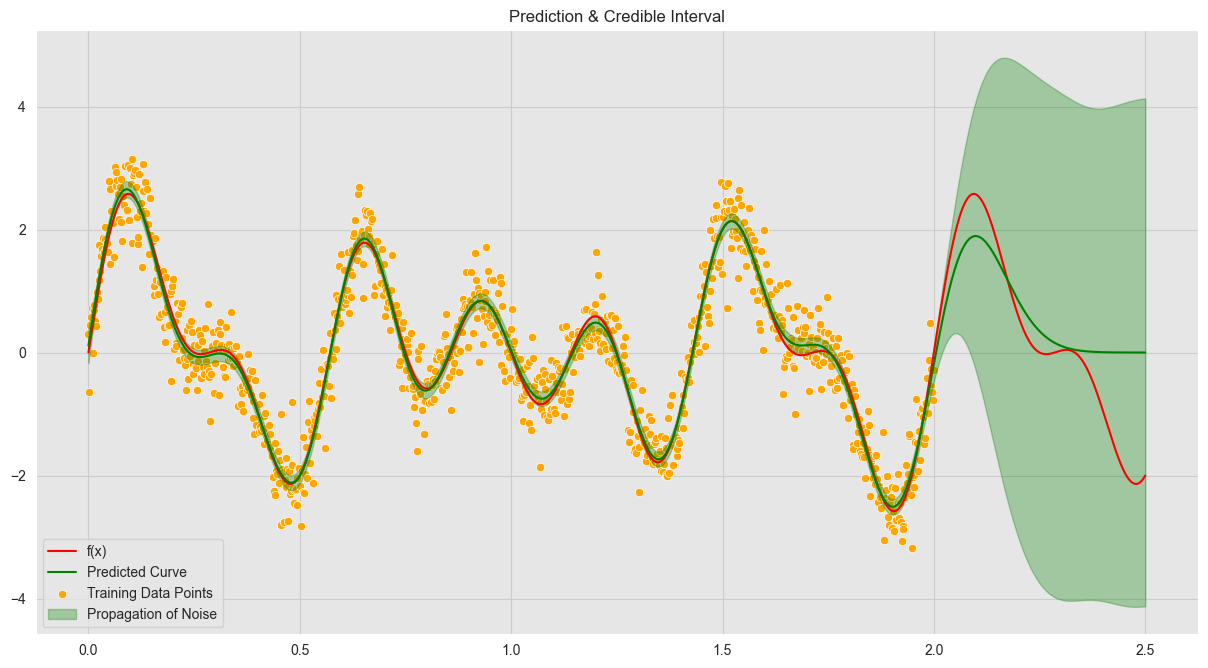

In [78]:
fig, ax = plt.subplots(figsize=(15, 8))
# Plot training data.
sns.scatterplot(x=x, y=y, label='Training Data Points', color='orange', ax=ax);
# Plot "true" linear fit.
sns.lineplot(
    x=x_star, 
    y=f(x_star), 
    color='red',
    label='u(x)', 
    ax=ax
)
# Plot corridor. 
ax.fill_between(
    x=x_star, 
    y1=(y_hat - 2*y_hat_sd), 
    y2=(y_hat + 2*y_hat_sd), 
    color='green',
    alpha=0.3, 
    label='Propagation of Noise'
)
# Plot prediction. 
sns.lineplot(x=x_star, y=y_pred, color='green', label='Predicted Curve')
ax.set(title='Prediction & Credible Interval')
ax.legend(loc='lower left');